In [16]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt

In [13]:
#mnistデータのロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
#28*28の画像データを1次元の配列に変換
X_train = X_train.reshape(60000, 28*28) / 255
X_test = X_test.reshape(10000, 28*28) / 255

In [17]:
#onehotベクトルに変換
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [69]:
#モデルの定義
model = Sequential([
        Dense(512, input_shape=(784,)),
        Activation('sigmoid'),
        Dense(256),
        Activation('sigmoid'),
        Dense(10),
        Activation('softmax')
        ])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss = []

In [65]:
#学習 
#verboseに1を入れると進捗を出力
#epochsは学習回数
#validation_split クロスバリデーションに利用する訓練データの割合
hist = model.fit(X_train, y_train, batch_size=200, verbose=1, epochs=50, validation_split=0.1)
loss += hist.history["loss"]
score = model.evaluate(X_test, y_test, verbose=1)
#score[loss,accuracy]
print('test accuracy : ', score)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 70us/step - loss: 0.6445 - acc: 0.8300 - val_loss: 0.2442 - val_acc: 0.9285
Epoch 2/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.2612 - acc: 0.9233 - val_loss: 0.1820 - val_acc: 0.9497
Epoch 3/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.2046 - acc: 0.9391 - val_loss: 0.1501 - val_acc: 0.9588
Epoch 4/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.1652 - acc: 0.9507 - val_loss: 0.1249 - val_acc: 0.9653
Epoch 5/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.1342 - acc: 0.9600 - val_loss: 0.1134 - val_acc: 0.9685
Epoch 6/50
54000/54000 [==============================] - 4s 66us/step - loss: 0.1122 - acc: 0.9668 - val_loss: 0.1013 - val_acc: 0.9712
Epoch 7/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.0919 - acc: 0.9731 - val_loss: 0.0932 - val_acc:

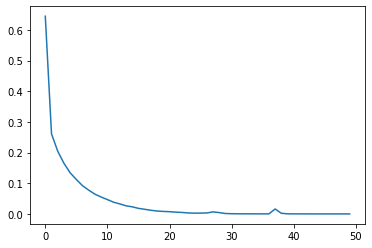

In [66]:
plt.plot(loss)